## Oil and Gas Machine Learning Project. 

> **Problem Statement** : To Develop a Regression Model that takes Operational parameters as inputs and provides Oil-Production Rates as Outputs.

# 1. Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Divyanshu-ISM/Machine-Learning-Deep-Learning/main/Volve%20P-12_DatesCorrected.csv',
                 index_col=0, parse_dates = True)

In [3]:
df.head()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.columns

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

## 2. Columns - select input and Output columns.

> Use Correlation Analysis as a Quick-Hack to do the same. 

Too High or Too Low Correlation magnitudes need to be avoided.

In [5]:
output_col = 'BORE_OIL_VOL'

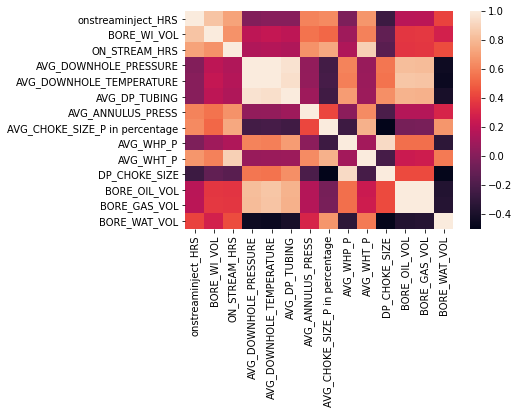

In [13]:
sns.heatmap(df.corr())

^ Can see from above matrix that some features are fairly inter-related, which breaks the assumption of LinReg, and hence we might see troubles in model performance.

> However, let's go with it for now. Let's fail and learn

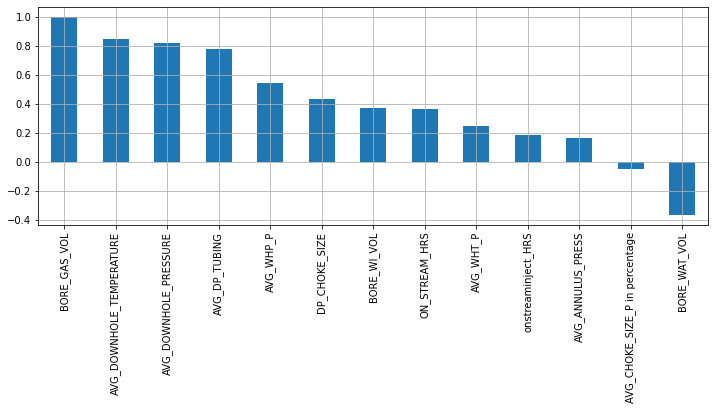

In [12]:
df.corr()[output_col].sort_values(ascending=False)[1:].plot(kind='bar', figsize=(12,4), grid=True)

In [21]:
corr_df = pd.DataFrame(df.corr()[output_col].sort_values(ascending=False)[1:])
corr_df.columns=['Corr']

In [22]:
corr_df

,Corr
BORE_GAS_VOL,0.998661
AVG_DOWNHOLE_TEMPERATURE,0.850241
AVG_DOWNHOLE_PRESSURE,0.819920
AVG_DP_TUBING,0.778941
AVG_WHP_P,0.544204
DP_CHOKE_SIZE,0.434375
BORE_WI_VOL,0.368739
ON_STREAM_HRS,0.361124
AVG_WHT_P,0.245750
onstreaminject_HRS,0.182405


In [56]:
input_columns = corr_df[(abs(corr_df['Corr'])>0.2) & (corr_df['Corr']<0.90)].index

## 2.1 Input Columns : Selecting features with good (but not extreme) correlations with output variables.

In [57]:
input_columns

Index(['AVG_DOWNHOLE_TEMPERATURE', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING',
       'AVG_WHP_P', 'DP_CHOKE_SIZE', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_WHT_P', 'BORE_WAT_VOL'],
      dtype='object')

# 3. Name Input matrix as X (Feature Matrix) and Output matrix as y (target).

In [58]:
X = df[input_columns] ; y = df[output_col]

In [59]:
X.shape , y.shape

((3291, 9), (3291,))

# 4. Train-Test (or Validation) Split. 

> In Time series Projects, we cannot do a shuffle/permutation based split. We need to maintain the sequence.

> Here, I am keeping last 291 days as Testing or Validation set.

In [62]:
train_length = 3000 #days

X_train , y_train = X.iloc[:train_length,:] , y[:train_length]

X_test , y_test = X.iloc[train_length:, :] , y[train_length:]

In [63]:
X_train.shape , X_test.shape

((3000, 9), (291, 9))

# 5. Feature Scaling. Important for better Training (in select models).

In [64]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [65]:
# scaler = MinMaxScaler()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

#6. Training A Machine Learning model. (Select the best of them all).

### 6.1 Option 1 : Multiple Linear Regression Model.

In [66]:
from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor

lm = LinearRegression()




In [67]:
lm.fit(X_train_scaled , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
yp_train = lm.predict(X_train_scaled)

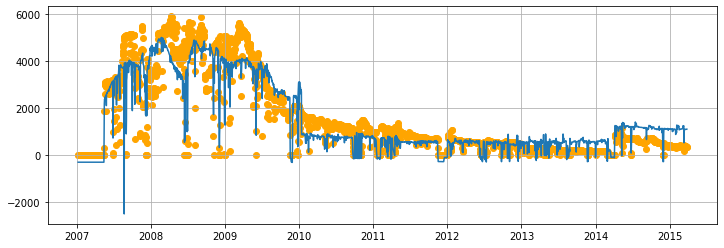

In [69]:
plt.figure(figsize=(12,4))

plt.scatter(df.index[:train_length] , y_train, color='orange')
plt.plot(df.index[:train_length] , yp_train)

plt.grid()

In [70]:
yp_test = lm.predict(X_test_scaled)

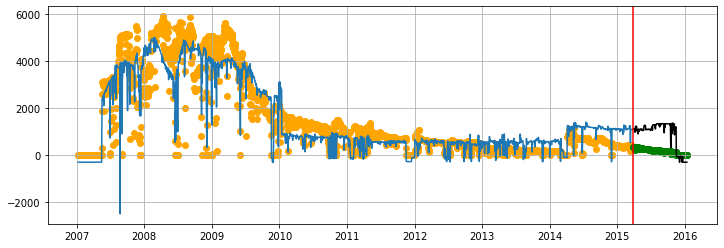

In [71]:
plt.figure(figsize=(12,4))

plt.scatter(df.index[:train_length] , y_train, color='orange')
plt.plot(df.index[:train_length] , yp_train)

plt.scatter(df.index[train_length:] , y_test, color='green')
plt.plot(df.index[train_length:] , yp_test, color='black')


plt.axvline(df.index[train_length], color='red')


plt.grid()

In [72]:
#################################################################################################

## Option 2 : RandomForest Regressor Model

> Ensemble Method | Ensemble of Trees 

> Scaling Not Required

In [73]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

yp_train = rf.predict(X_train)

yp_test = rf.predict(X_test)

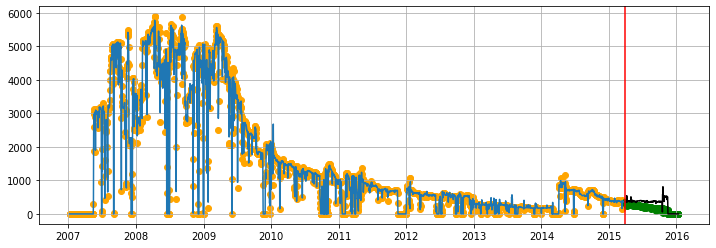

In [74]:
plt.figure(figsize=(12,4))

plt.scatter(df.index[:train_length] , y_train, color='orange')
plt.plot(df.index[:train_length] , yp_train)

plt.scatter(df.index[train_length:] , y_test, color='green')
plt.plot(df.index[train_length:] , yp_test, color='black')


plt.axvline(df.index[train_length], color='red')


plt.grid()

In [75]:
###################################################################################################

## Option 3 (Practice-Task) : Resample it to monthly and then repeat the entire process. 

> Better performance expected since much of the data will be smoothened with lesser operational noises, and hence can train a better model.